In [1]:
import tensorflow as tf # Import tensorflow library
import pprint           # Import pprint library for better print format

device_name = tf.config.list_physical_devices()
pprint.pprint(device_name)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np                                                     # Import numpy library
import matplotlib.pyplot as plt                                        # Import mathplot library
import datetime                                                        # Import datetime library
from pprint import pprint                                              # Import pprint library
from keras.datasets import mnist                                       # Import MNIST dataset
from keras.models import Sequential                                    # Import Sequential class
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # Import Conv2D, MaxPooling2D, Dense, Dropout, Flatten class
from keras.utils import to_categorical                                 # Import to categorical utilities

batch_size = 128             # Number of samples per gradient update
num_classes = 10             # Number of classes in the dataset
epochs = 10                  # Number of epochs to train the model
img_rows, img_cols = 28, 28  # Image dimensions

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load MNIST dataset from Keras
print('Shape of train set: {}, Shape of test set: {}'.format(x_train.shape, x_test.shape))

11490434/11490434 [==============================] - 1s 0us/step
Shape of train set: (60000, 28, 28), Shape of test set: (10000, 28, 28)


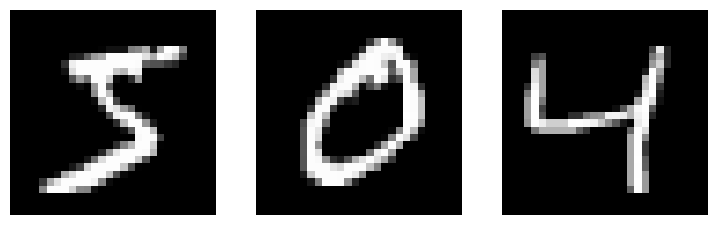

In [4]:
plt.figure(figsize=(9,3))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')         # Show the first three images in train set
  plt.axis('off')                             # Turn the axis off
plt.show()                                    # Display the figure window

In [5]:
# Reshape the data to 4-dimension. The last dimension represent the number of channels.
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# There are 10 classes and classes are represented as unique integers(0 to 9).
# To do so, transforming the integer into a 10 element binary vector.
# eg. [2] -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, num_classes)  # Shape from (60000,) -> (60000, 10)
y_test = to_categorical(y_test, num_classes)    # Shape from (10000,) -> (10000, 10)

In [6]:
# Create the model
# Method 1
model = Sequential()  # Create a Sequential object
# ----- Convolutional Layer -----
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
# -------------------------------
model.add(Flatten())  # Flatten operation. Shape from (B, H, W, C) -> (B, H*W*C)
# ---------- FC Layer -----------
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


# Method 2
model2 = Sequential(
    [Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Add a convolutional layer with 32 kernels, each of size 3x3
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                            # Add another convolutional layer with 64 kernels, each of size 3x3
    MaxPooling2D(pool_size=(2, 2)),                                                       # Add a max pooling layer of size 2x2
    Dropout(0.1),                                                                         # Add a dropout layer to prevent a model from overfitting
    Flatten(),                                                                            # Add a flatten layer to convert the pooled data to a single column
    Dense(units=128, activation='relu'),                                                  # Add a dense layer (fully-connected layer) and use ReLU activation function
    Dense(units=10, activation='softmax')]                                                # Add a dense layer (fully-connected layer) and use Softmax activation function
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
training_history = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 21s 16ms/step - loss: 0.8187 - accuracy: 0.9383 - val_loss: 0.0615 - val_accuracy: 0.9796
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0563 - val_accuracy: 0.9839
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0509 - val_accuracy: 0.9840
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0561 - val_accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0563 - val_accuracy: 0.9855
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0634 - val_accuracy: 0.9847
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0575 - val_accuracy: 0.9856
E

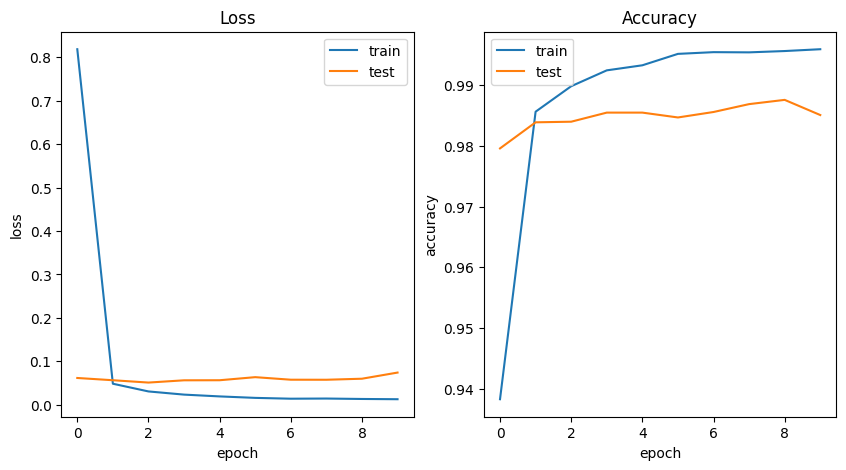

In [10]:
# Visualize the Loss and Accuracy from training_history
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])          # Plot the training loss
plt.plot(training_history.history['val_loss'])      # Plot the validation loss
plt.title('Loss')                               # Set the title
plt.xlabel('epoch')                             # Set the label of x axis
plt.ylabel('loss')                              # Set the label of y axis
plt.legend(['train', 'test'])                       # Set the legend

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'])      # Plot the training accuracy
plt.plot(training_history.history['val_accuracy'])  # Plot the validation accuracy
plt.title('Accuracy')                           # Set the title
plt.xlabel('epoch')                             # Set the label of x axis
plt.ylabel('accuracy')                          # Set the label of y axis
plt.legend(['train', 'test'])                       # Set the legend

plt.show()                                         # Display the figure window

In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)  # verbose=0 means no progress bar
print('Validation loss: {}'.format(val_loss))
print('Validation accuracy: {}'.format(val_acc))

Validation loss: 0.07393819838762283
Validation accuracy: 0.9850999712944031


In [12]:
# Save the mdoel to an HDFS file
model_name = 'my_model.h5'                # define model name
model.save(model_name, save_format='h5')  # save the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
